# Clean PIOMAS data for CREG configuration ice initial state

In [1]:
# Select the PANGEO kernel to be able to use this Notebook
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

>> # Create a tmask for CREG 

In [2]:
CONFIG='CREG12.L75'

if CONFIG == 'CREG12.L75' :
    DATADOM='/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/'
    filedom='CREG12.L75-REF09_domain_cfg_20230810_Z.nc'

if CONFIG == 'CREG025.L75' :
    DATADOM='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/RUNS/CREG025.L75/CREG025.L75-I/'
    filedom='CREG025.L75_domain_cfg.nc'

ds_dom=xr.open_dataset(DATADOM+filedom)
ds_dom

<xarray.Dataset>
Dimensions:       (t: 1, y: 1801, x: 1580, z: 75, nlines: 114)
Dimensions without coordinates: t, y, x, z, nlines
Data variables: (12/43)
    bathy_meter   (t, y, x) float32 ...
    bottom_level  (t, y, x) int32 ...
    e1f           (t, y, x) float64 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    ...            ...
    namelist_cfg  (nlines) |S115 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    nav_lon       (y, x) float32 ...
    time_counter  (t) float32 ...
    top_level     (t, y, x) int32 ...
Attributes:
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [1580 1801]
    DOMAIN_size_local:       [1580 1801]
    DOMAIN_position_first:   [1 1]
    DOMAIN_position_last:    [1580 1801]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    NCO:                     netCDF Operators version 5.0.1 (Homepage = http:...
    history:                 Mon Aug 14 15:57:07 2023: ncrename -d time_count...

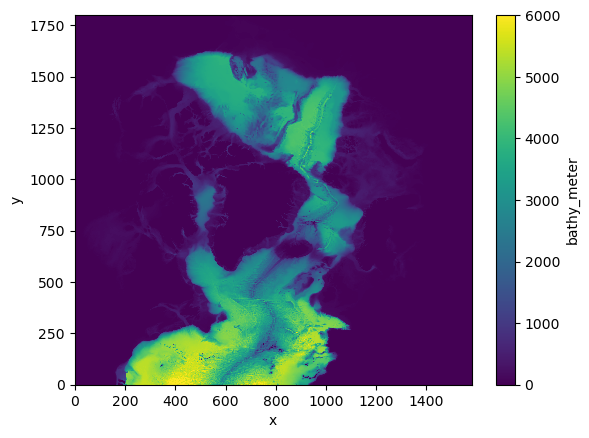

In [3]:
ds_dom['bathy_meter'].plot()

In [4]:
tmask=xr.where(ds_dom['bathy_meter'][0,:,:] > 0.,1.,0.)

In [5]:
tmask.shape

(1801, 1580)

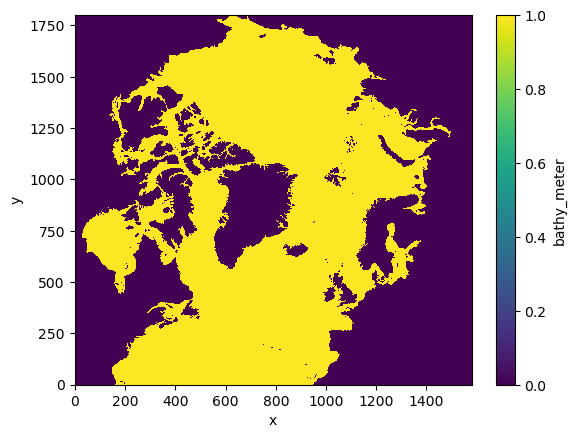

In [6]:
tmask.plot()

>> # Read PIOMAS data interpolated on CREG

In [7]:
DATAP="/data0/project/drakkar/CONFIGS/CREG12.L75/"

In [8]:
ds_1979=xr.open_dataset(DATAP+'CREG12.L75_PIOMAS_y1979_Z.nc')
ds_2000=xr.open_dataset(DATAP+'CREG12.L75_PIOMAS_y2000_Z.nc')

In [9]:
ds_1979

<xarray.Dataset>
Dimensions:    (time: 12, y: 1801, x: 1580)
Coordinates:
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
  * time       (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0
Dimensions without coordinates: y, x
Data variables:
    area       (time, y, x) float64 ...
    heff       (time, y, x) float64 ...
    snow       (time, y, x) float64 ...
Attributes:
    history:  Thu Apr 27 14:58:00 2023: ncks -4 -L 1 CREG12.L75_PIOMAS_y1979....
    NCO:      "4.6.4"

Text(0.5, 1.0, 'NSIDC area January \n differences 2000-1979')

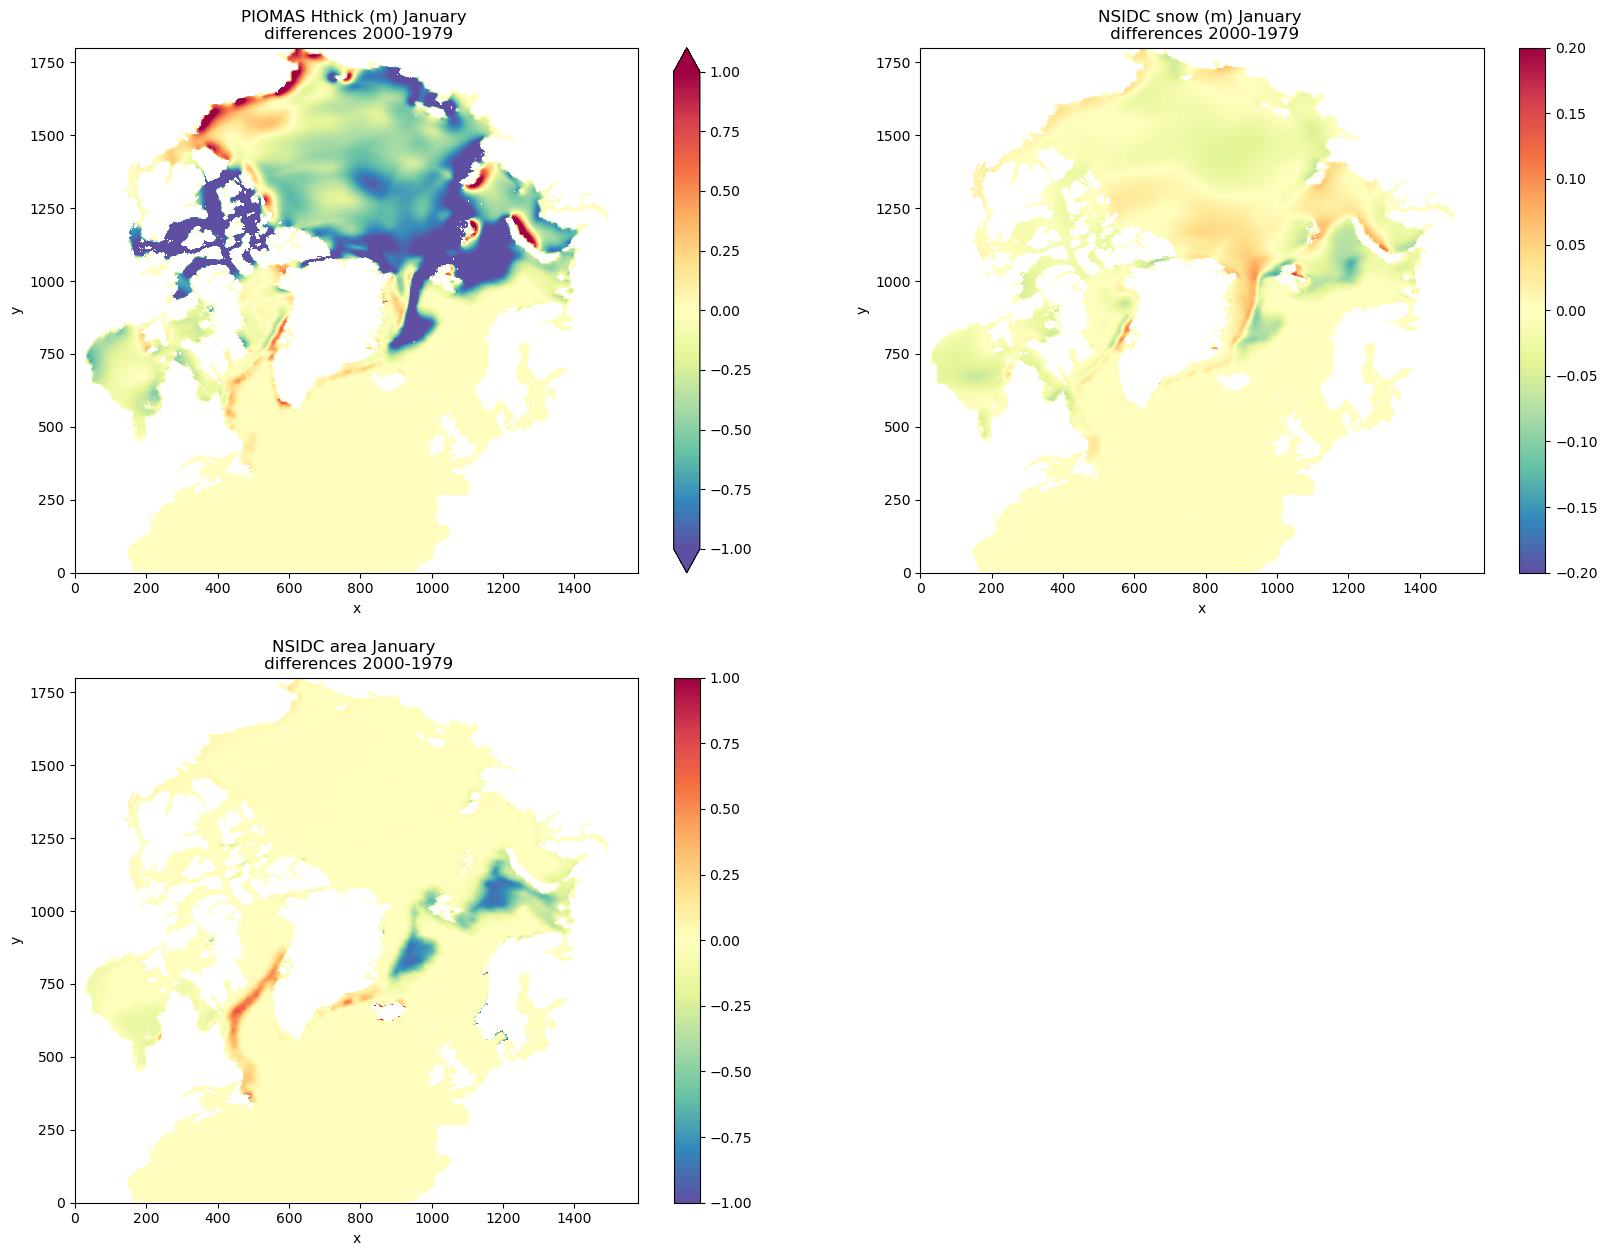

In [19]:
plt.figure(figsize=(20,15))

plt.subplot(221)
xr.where(tmask < 1., np.nan,(ds_2000['heff']-ds_1979['heff'])).isel(time=0).plot(vmax=1,cmap='Spectral_r')
plt.title('PIOMAS Hthick (m) January \n differences 2000-1979' )

plt.subplot(222)
xr.where(tmask < 1., np.nan,(ds_2000['snow']-ds_1979['snow'])).isel(time=0).plot(vmax=0.2,cmap='Spectral_r')
plt.title('NSIDC snow (m) January \n differences 2000-1979' )
          
plt.subplot(223)
xr.where(tmask < 1., np.nan,(ds_2000['area']-ds_1979['area'])).isel(time=0).plot(vmax=1,cmap='Spectral_r')
plt.title('NSIDC area January \n differences 2000-1979' )

In [11]:
fld_piomas['tmask']=(('time_counter','y','x'),np.tile(np.array(tmask),(12,1,1)))

NameError: name 'fld_piomas' is not defined

In [ ]:
fld_piomas['heff_msk']=(('time_counter','y','x'),fld_piomas['tmask']*fld_piomas['heff'])
fld_piomas['snow_msk']=(('time_counter','y','x'),fld_piomas['tmask']*fld_piomas['snow'])
fld_piomas['area_msk']=(('time_counter','y','x'),fld_piomas['tmask']*fld_piomas['area'])
fld_piomas

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(221)
fld_piomas['heff_msk'].isel(time_counter=0).plot(vmax=6,cmap='Spectral_r')

plt.subplot(222)
fld_piomas['snow_msk'].isel(time_counter=0).plot(vmax=0.3,cmap='Spectral_r')

plt.subplot(223)
fld_piomas['area_msk'].isel(time_counter=0).plot(vmax=1,cmap='Spectral_r')

